In [1]:
%load_ext autoreload
%autoreload 2

# Training on the dataset

## Imports

In [2]:
import importlib
import mlp_model
from mlp_model import MLPTrainer, MLPConfig, MLP
from data_loader import load_train_data, load_test_data
importlib.reload(mlp_model)


<module 'mlp_model' from '/home/artypuppet/COMP432-Project/notebooks/mlp_model.py'>

## Load the data and config

In [3]:
X, y = load_train_data()

In [4]:
config_path = "../configs/mlp_config.json"
model_config = MLPConfig.load_from_config(config_path)

## Train

Learning rate: 0.000500
Epoch 1/75
                loss  accuracy  precision    recall  f1_score
Train       2.986853  0.259033   0.248121  0.258648  0.249631
Validation  2.378399  0.408977   0.461310  0.410670  0.401409
New best loss: 2.3784
Learning rate: 0.000500
Epoch 2/75
New best loss: 1.9911
Learning rate: 0.000499
Epoch 3/75
New best loss: 1.8199
Learning rate: 0.000498
Epoch 4/75
New best loss: 1.7062
Learning rate: 0.000497
Epoch 5/75
New best loss: 1.6491
Learning rate: 0.000495
Epoch 6/75
                loss  accuracy  precision    recall  f1_score
Train       1.036160  0.811154   0.811054  0.811024  0.810948
Validation  1.581367  0.652760   0.668518  0.653645  0.652841
New best loss: 1.5814
Learning rate: 0.000492
Epoch 7/75
New best loss: 1.5321
Learning rate: 0.000489
Epoch 8/75
New best loss: 1.5125
Learning rate: 0.000486
Epoch 9/75
New best loss: 1.4694
Learning rate: 0.000483
Epoch 10/75
New best loss: 1.4653
Learning rate: 0.000479
Epoch 11/75
                loss 

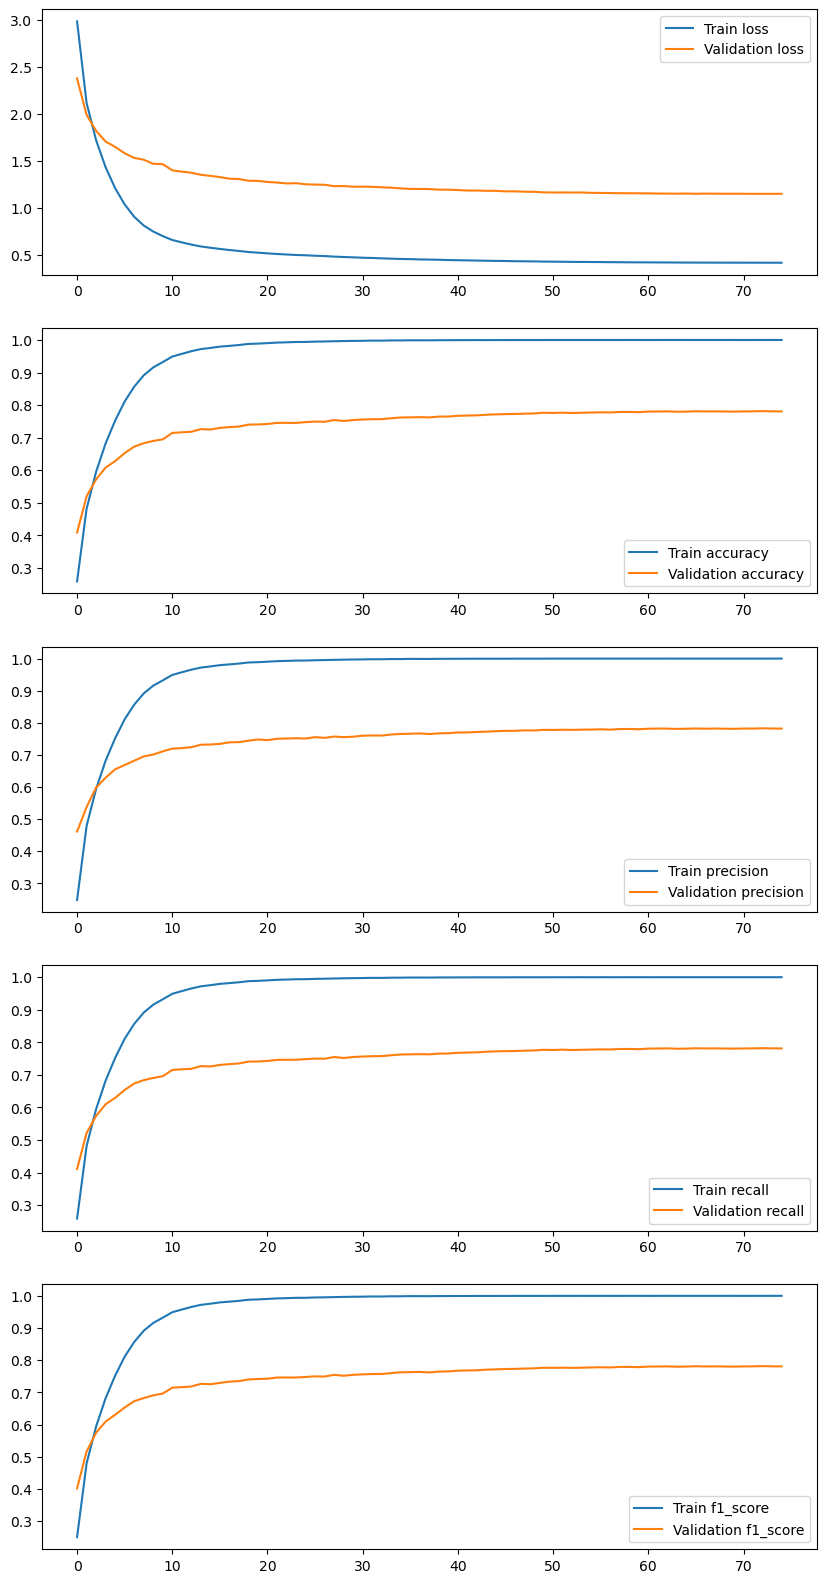

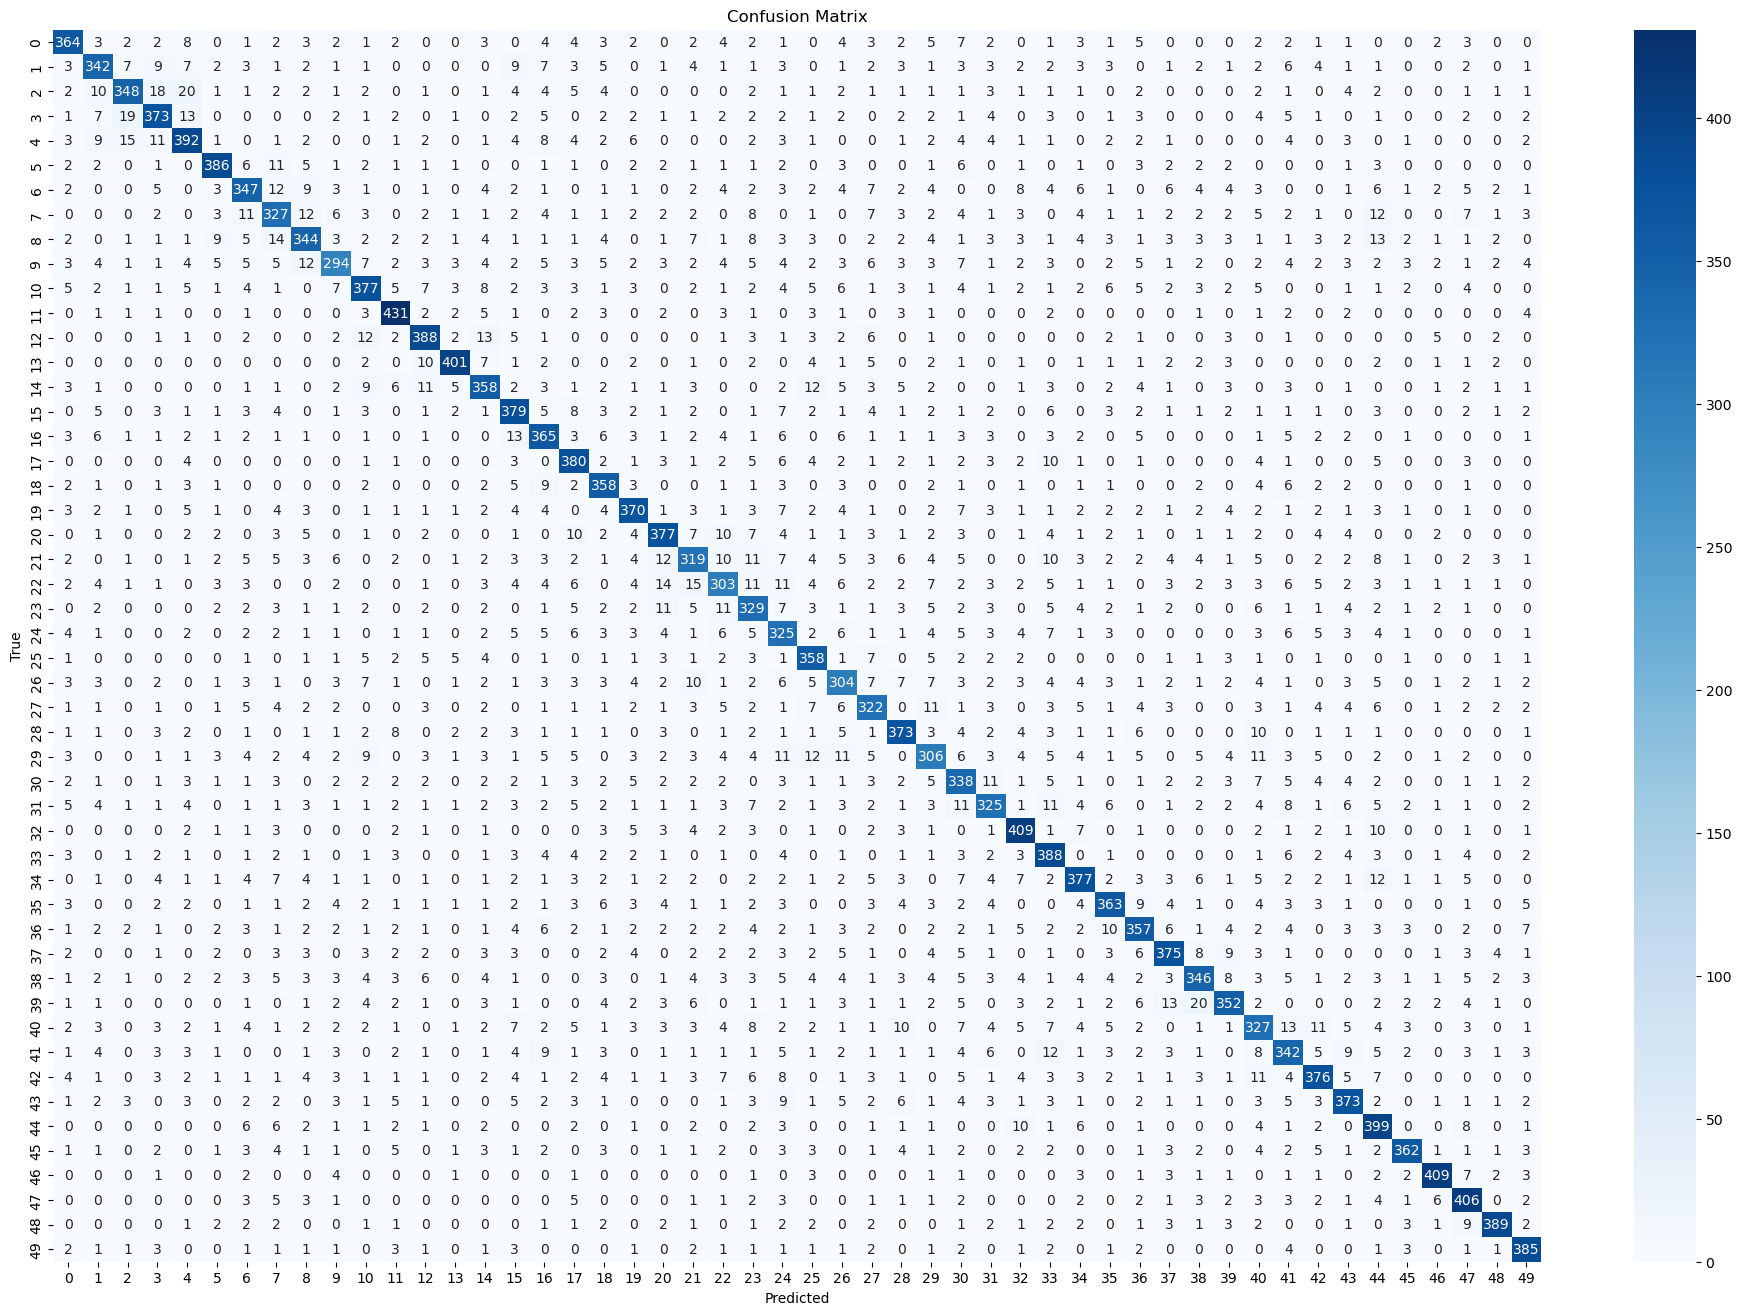

In [ ]:
trainer = MLPTrainer(model_config)
trainer.setup_dataloaders(X, y)
train_stats, val_stats, best_model_path = trainer.train()


## Training for final testing   

In [5]:
# Then train on full dataset
# Reinitialize the trainer (or create a new one) to start fresh
trainer_full = MLPTrainer(model_config)
trainer_full.setup_full_dataloader(X, y)  # Use full dataset
final_model_path = trainer_full.train_full_dataset(num_epochs=58)


Learning rate: 0.000500
Epoch 1/58
           loss  accuracy  precision    recall  f1_score
Train  2.747262  0.326101   0.318789  0.326097  0.320672
Learning rate: 0.000500
Epoch 2/58
Learning rate: 0.000499
Epoch 3/58
Learning rate: 0.000497
Epoch 4/58
Learning rate: 0.000494
Epoch 5/58
Learning rate: 0.000491
Epoch 6/58
           loss  accuracy  precision    recall  f1_score
Train  0.943503  0.854028   0.854018  0.854027  0.853967
Learning rate: 0.000487
Epoch 7/58
Learning rate: 0.000482
Epoch 8/58
Learning rate: 0.000477
Epoch 9/58
Learning rate: 0.000471
Epoch 10/58
Learning rate: 0.000465
Epoch 11/58
           loss  accuracy  precision    recall  f1_score
Train  0.641616  0.965695   0.965713  0.965694  0.965697
Learning rate: 0.000457
Epoch 12/58
Learning rate: 0.000450
Epoch 13/58
Learning rate: 0.000441
Epoch 14/58
Learning rate: 0.000432
Epoch 15/58
Learning rate: 0.000423
Epoch 16/58
           loss  accuracy  precision    recall  f1_score
Train  0.561201  0.988164   0.9881

In [7]:
X, test_ids = load_test_data(None, return_ids=True)

In [8]:
_ = trainer_full.test(X, ids=test_ids)